In [43]:
#data analyse 
import pandas as pd 
import numpy as np 
#visualisation de données
import seaborn as sns 
from scipy import stats 
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [44]:
df_final = pd.read_csv(r'C:\Users\Nico\Desktop\df_2019_final.csv')

In [45]:
df_final

,happy_rank,country,happy_score,gdp_per_capita,social_support_score,healthy_life_exp_score,life_freedom,generosity,anti_trust,year,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,...,706.0,11.0,6.0,NaN,266.0,2043.0,1152.0,2589.0,70.0,2.0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,...,1133.0,10.0,48.0,NaN,294.0,4572.0,955.0,2684.0,75.0,2.0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,...,776.0,20.0,93.0,NaN,202.0,2771.0,360.0,1409.0,54.0,2.0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,...,33.0,1.0,2.0,NaN,11.0,111.0,17.0,62.0,2.0,0.0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,...,3780.0,14.0,126.0,NaN,810.0,10766.0,1810.0,6478.0,108.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,2019,...,1783.0,290.0,1979.0,NaN,2077.0,2402.0,3691.0,5845.0,321.0,300.0
137,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,2019,...,2676.0,450.0,941.0,NaN,11717.0,5738.0,2786.0,4877.0,839.0,523.0
138,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019,...,1266.0,184.0,1095.0,NaN,2402.0,2520.0,2599.0,4297.0,219.0,178.0
139,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019,...,6232.0,1020.0,6613.0,NaN,5824.0,7001.0,8547.0,14522.0,1198.0,637.0


In [46]:
# Grouping all needed columns in one list to iterate on them
cols = ['gdp_per_capita', 'social_support_score', 'healthy_life_exp_score', 'life_freedom', 'generosity', 'anti_trust', 'alcohol_use_disorders', 'protein_energy_malnutrition']

Score VS gdp_per_capita
Correlation:  0.7896011239268277


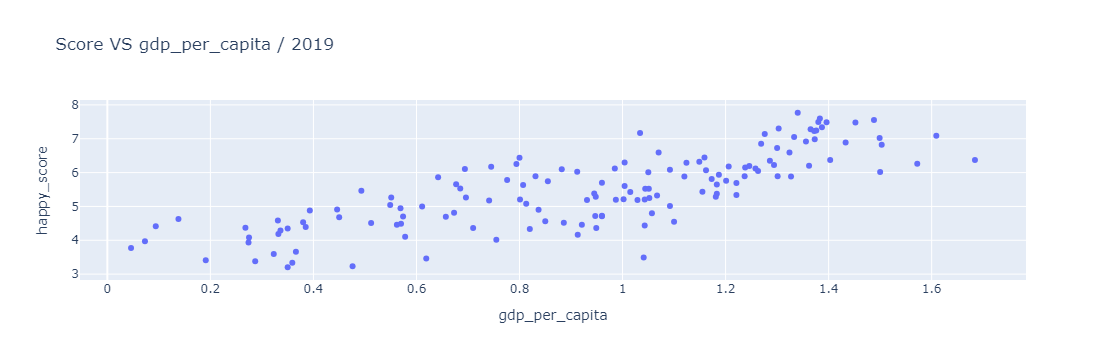

Score VS social_support_score
Correlation:  0.7695579763094145


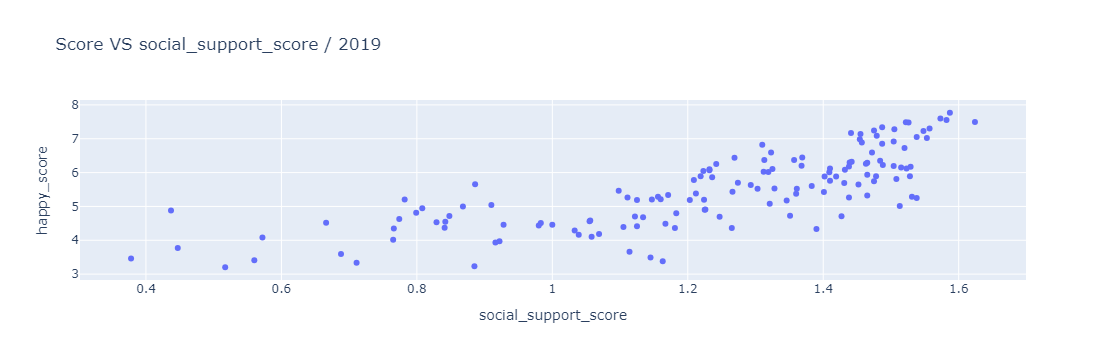

Score VS healthy_life_exp_score
Correlation:  0.7779577569862786


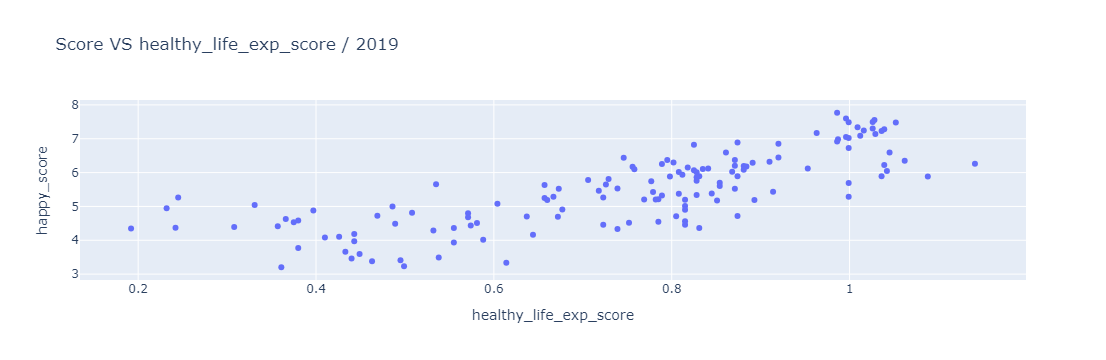

Score VS life_freedom
Correlation:  0.5639761895142867


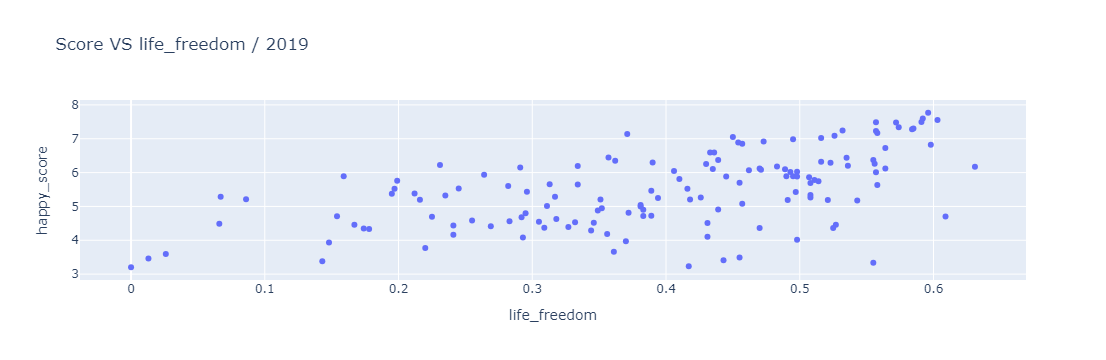

Score VS generosity
Correlation:  0.0882541382914732


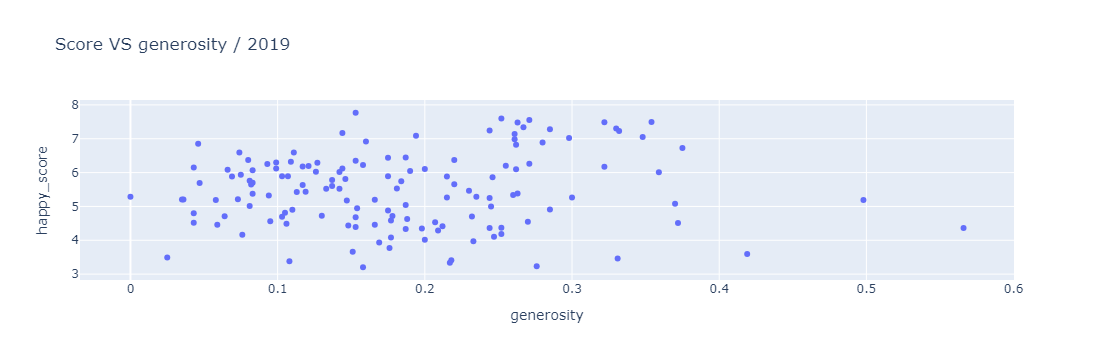

Score VS anti_trust
Correlation:  0.4253910057256126


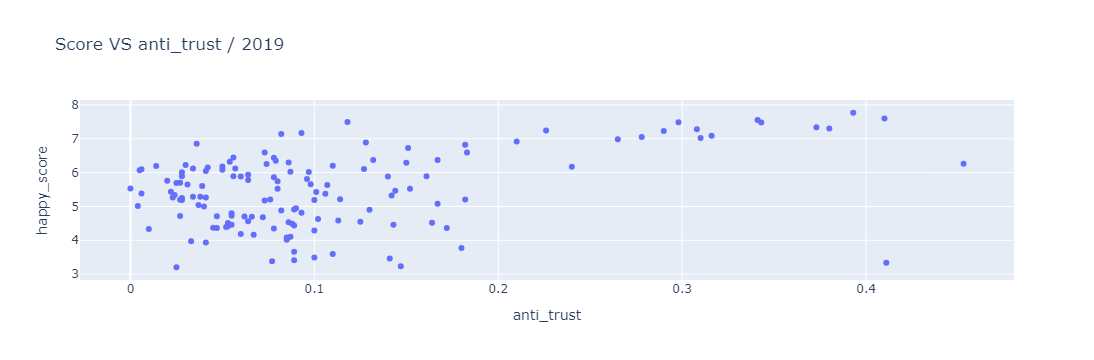

Score VS alcohol_use_disorders
Correlation:  0.028694485043962523


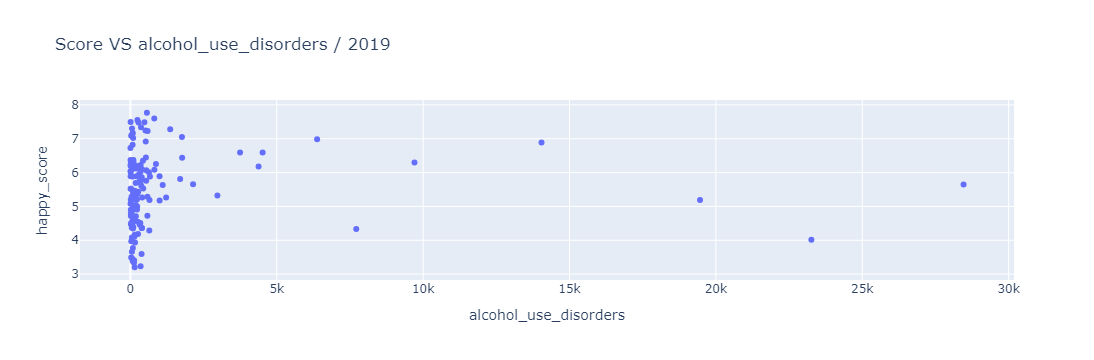

Score VS protein_energy_malnutrition
Correlation:  -0.22142225914516062


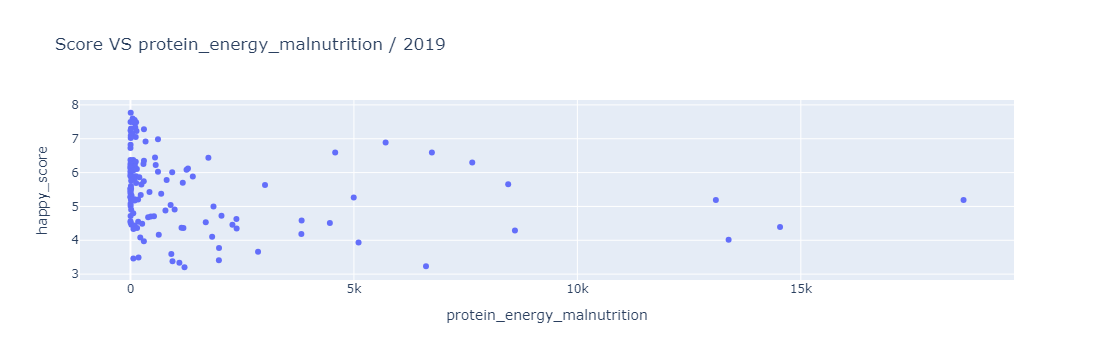

In [47]:
# for loop to calc the correlation and plot the relationship between the Score column and each column in the list
for col in cols:
    print(f"Score VS {col}")
    # calc the correlation between the Score column and other columns in the list
    correlation = df_final['happy_score'].corr(df_final[col])
    print("Correlation: ",correlation)
    
    # visualize the relationship between the Score column and each column in the list
    fig = px.scatter(df_final, x=col, y='happy_score', title=f"Score VS {col} / 2019")
    fig.show()

From the previous analysis, we found that:
 there is a strong positive correlation between score and:
    - GDP per capita
    - Social support
    - Healthy life expectancy
 there is a moderate positive correlation between score and:
    - Freedom to make life choices
 there is a weak positive correlation between score and:
    - Perceptions of corruption
 there is a very weak positive correlation between score and:
    - Generosity
 there is no correlation between score and :
    - Alcohol consomation (apart for a few outliers) 
    - Malnutrition (apart for a few outliers)

In [48]:
# list the highest and lowest 10 countries or regions to explore them
df_final = df_final.sort_values(by=['happy_score'], ascending=False)
highest_df = df_final.head(10)
lowest_df = df_final.tail(10)

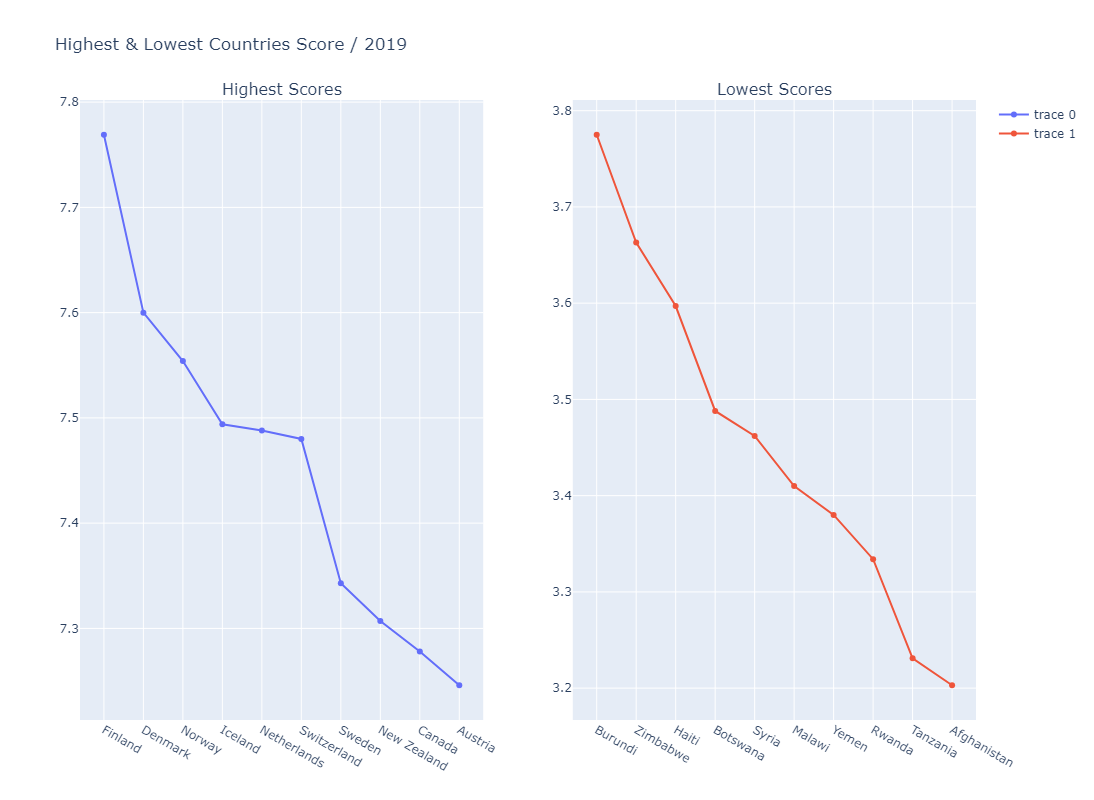

In [49]:
# visualize the highest & lowest 10 countries or regions scores
fig = make_subplots(rows=1, cols=2, subplot_titles=("Highest Scores", "Lowest Scores"))

fig.add_trace(
    go.Scatter(x=highest_df["country"], y=highest_df["happy_score"], mode='markers+lines'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=lowest_df["country"], y=lowest_df["happy_score"], mode='markers+lines'),
    row=1, col=2
)

fig.update_layout(height=800, width=1300, title_text="Highest & Lowest Countries Score / 2019")
fig.show()

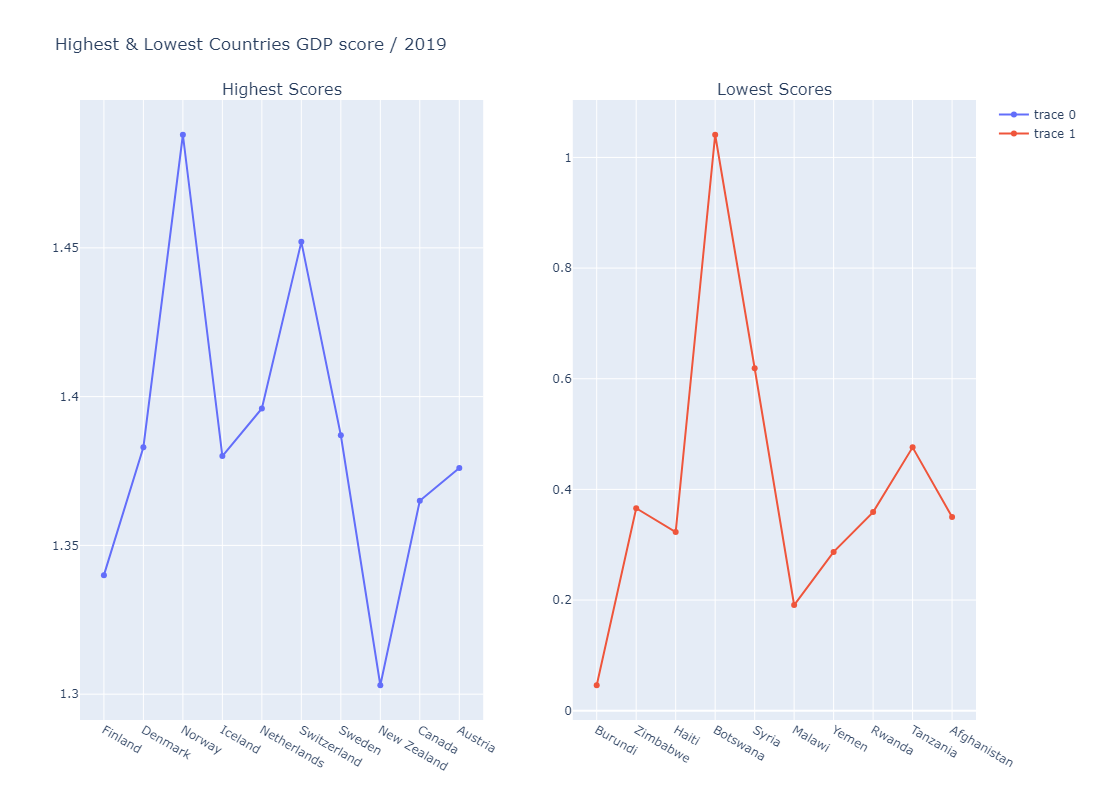

In [50]:
# visualize the highest & lowest countries GDP per capita
fig = make_subplots(rows=1, cols=2, subplot_titles=("Highest Scores", "Lowest Scores"))

fig.add_trace(
    go.Scatter(x=highest_df["country"], y=highest_df["gdp_per_capita"], mode='markers+lines'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=lowest_df["country"], y=lowest_df["gdp_per_capita"], mode='markers+lines'),
    row=1, col=2
)

fig.update_layout(height=800, width=1300, title_text="Highest & Lowest Countries GDP score / 2019")
fig.show()

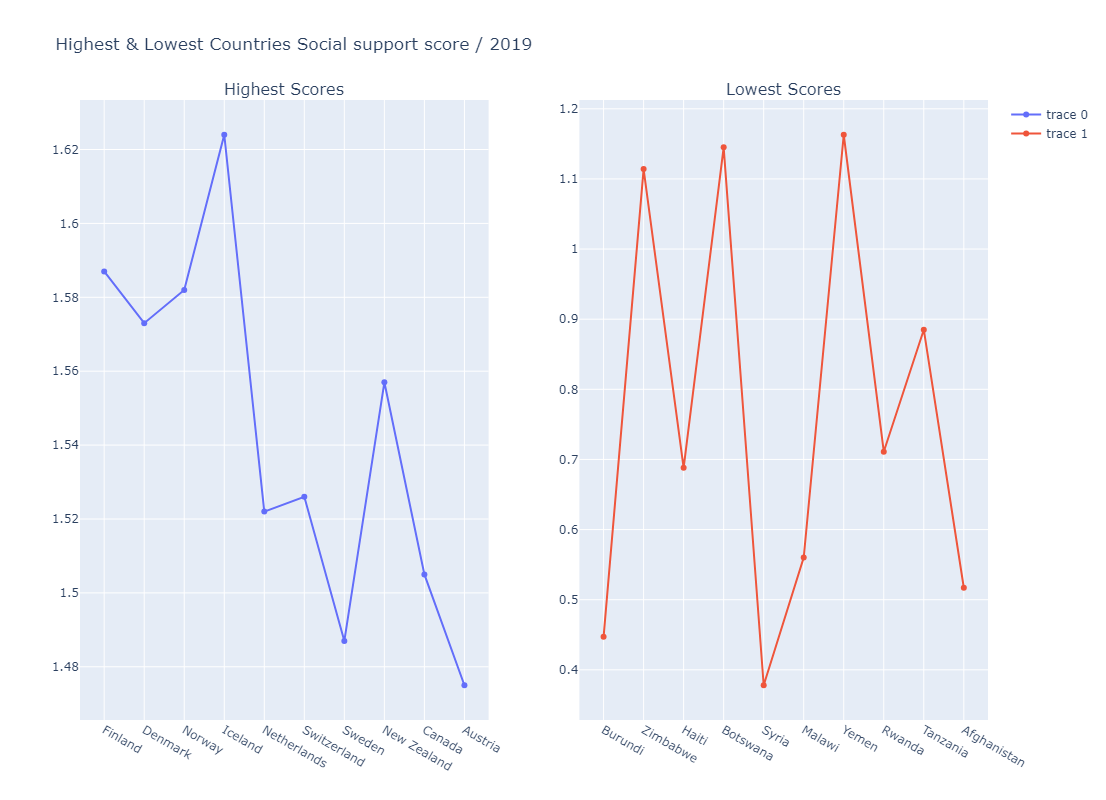

In [51]:
# visualize the highest & lowest countries Social Support
fig = make_subplots(rows=1, cols=2, subplot_titles=("Highest Scores", "Lowest Scores"))

fig.add_trace(
    go.Scatter(x=highest_df["country"], y=highest_df["social_support_score"], mode='markers+lines'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=lowest_df["country"], y=lowest_df["social_support_score"], mode='markers+lines'),
    row=1, col=2
)

fig.update_layout(height=800, width=1300, title_text="Highest & Lowest Countries Social support score / 2019")
fig.show()

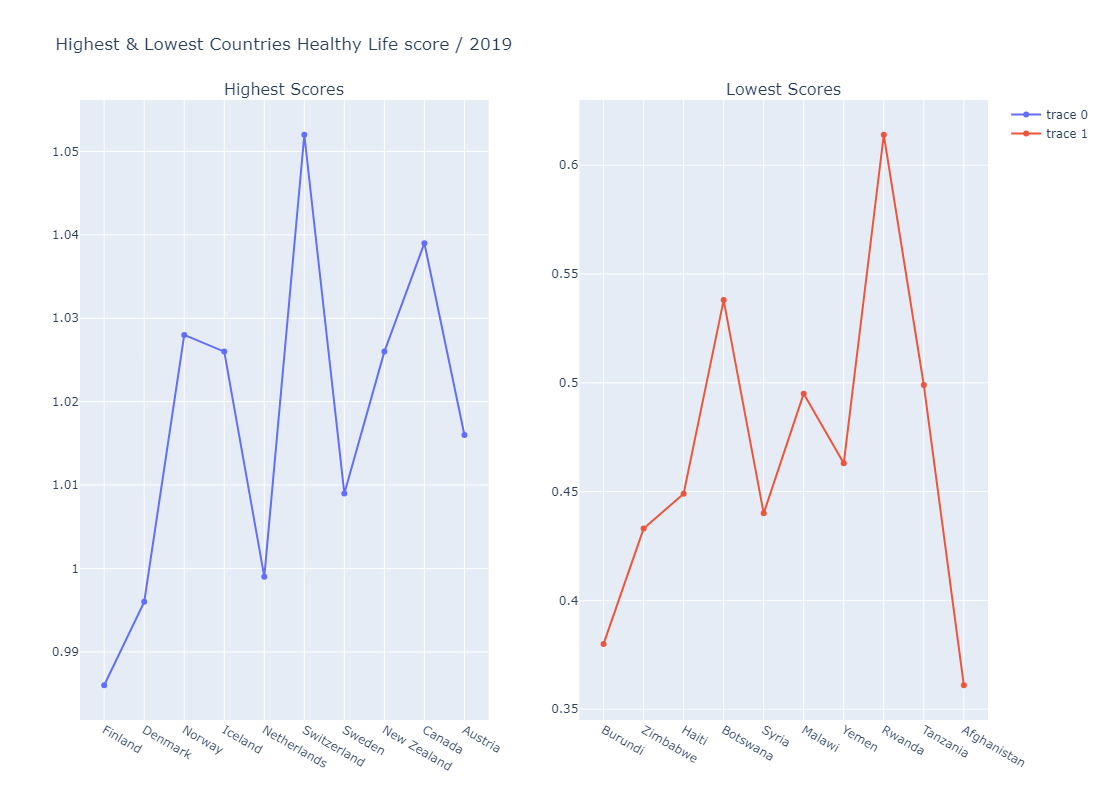

In [52]:
# visualize the highest & lowest countries GDP per capita
fig = make_subplots(rows=1, cols=2, subplot_titles=("Highest Scores", "Lowest Scores"))

fig.add_trace(
    go.Scatter(x=highest_df["country"], y=highest_df["healthy_life_exp_score"], mode='markers+lines'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=lowest_df["country"], y=lowest_df["healthy_life_exp_score"], mode='markers+lines'),
    row=1, col=2
)

fig.update_layout(height=800, width=1300, title_text="Highest & Lowest Countries Healthy Life score / 2019")
fig.show()